### Importações e Definições

In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
from biokit.viz import corrplot

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

def standard_scaller(data):
    return (data - data.mean()) / data.std()

def plot_metrica(xdata, ydata, zdata, xlabel, ylabel, zlabel):
    fig = go.Figure()

    if zdata != []:
        fig.add_trace(go.Scatter3d(
            x = xdata,
            y = ydata,
            z = zdata
        ))

        fig.update_layout(scene = dict(
            xaxis_title = xlabel,
            yaxis_title = ylabel,
            zaxis_title = zlabel
        ))
    else:
        fig.add_trace(go.Scatter(
            x = xdata,
            y = ydata
        ))

        fig.update_layout(
            xaxis_title = xlabel,
            yaxis_title = ylabel
        )

    fig.update_layout(width = 600, height = 600)
    fig.show()
    
def radar_chart(categories, values, title="Radar Chart"):
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)

    ax.set_title(title, fontsize=16, pad=20)

    plt.show()
    
def analise_de_cluster(clusters_data, Cluster):
    
    skills = ['Physical Skills', 'Energy Manipulation', 'Elemental Powers', 'Mental and Psychic Powers', 'Space-Time Manipulation',
          'Body Transformation', 'Supernatural Forces', 'Tech Skills', 'Perception Skills', 'Locomotion Skills', 'Combat Skills']

    races = ['Race_group_by_Alien', 'Race_group_by_Artificial Beings', 'Race_group_by_Divine and Semidivine', 'Race_group_by_Genetically Altered Beings',
       'Race_group_by_Human and Variation', 'Race_group_by_Mythical', 'Race_group_by_Not Identified', 'Race_group_by_Underwater']
    
    skill_media = list()
    for skill in skills:
        skill_media.append(round(clusters_data[Cluster][skill].mean(), 2))

    raca_media = list()
    for race in races:
        raca_media.append(round(clusters_data[Cluster][race].mean(), 2))

    radar_chart(skills, skill_media, f"Distribuição de poderes no cluster {Cluster}")
    radar_chart(races, raca_media, f"Distribuição de raças no cluster {Cluster}")

    gender = list()
    for i in clusters_data[Cluster].index:
        if clusters_data[Cluster].Gender_Female.loc[i] == 1:
            gender.append('Female')
        elif clusters_data[Cluster].Gender_Male.loc[i] == 1:
            gender.append('Male')
        else:
            gender.append('Other / Not Identified')

    x, y = np.unique(gender, return_counts = True)
    sns.barplot(x = x, y = y)
    plt.title(f'Distribuição de gêneros no Cluster {Cluster}')
    plt.show()

    alignment = list()
    for i in clusters_data[Cluster].index:
        if clusters_data[Cluster].Alignment_good.loc[i] == 1:
            alignment.append('Good')
        elif clusters_data[Cluster].Alignment_bad.loc[i] == 1:
            alignment.append('Bad')
        else:
            alignment.append('Neutral / Not Identified')

    x, y = np.unique(alignment, return_counts = True)
    sns.barplot(x = x, y = y)
    plt.title(f'Distribuição de alinhamentos no Cluster {Cluster}')
    plt.show()
    
heroes = pd.read_csv('..\\Bases de Dados\\hero_db.csv')
heroes2 = heroes.drop(columns = ['name', 'Gender', 'Publisher_group_by', 'Race_group_by', 'Alignment'])
heroes2.replace({True: 1, False: 0}, inplace = True)
heroes2.head()

,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good
0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,203.0,441.0,0,1,0,1
1,9,0,0,2,0,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,191.0,65.0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,185.0,90.0,1,0,0,1
3,4,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,203.0,441.0,0,1,1,0
4,6,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,193.0,122.0,0,1,1,0


## Normalização

In [118]:
# Usei a StandardScaler pq mantem a distribuição dos dados, o que não impacta em modelos que precisam assumir que os dados 
# estão centrados (como em projetos de clusterização)

heroes2_normalized = pd.DataFrame({})
for col in heroes2.columns:

    if ('Gender' in col) | ('Alignment' in col) | ('Race' in col):
        heroes2_normalized[col] = heroes2[col]
    else:
        heroes2_normalized[col] = standard_scaller(heroes2[col])

display(heroes2_normalized.describe())
display(heroes2_normalized.head())

,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000
mean,-9.303055e-17,-8.776467e-17,-1.755293e-17,7.021173e-18,5.265880e-18,-3.510587e-17,-9.127525e-17,1.228705e-17,-4.388233e-17,-3.422822e-17,2.106352e-17,0.290514,0.691700,0.051383,0.029644,0.029644,0.114625,0.424901,0.023715,0.300395,0.011858,5.265880e-17,2.106352e-17,0.000000,-1.755293e-17,5.265880e-17,3.510587e-18,-5.616939e-17,0.000000,-1.404235e-17,1.755293e-17,-9.127525e-17,-3.510587e-18,7.547761e-17,-3.686116e-17,0.284585,0.675889
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.454449,0.462248,0.220997,0.169772,0.169772,0.318884,0.494817,0.152312,0.458884,0.108353,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.451663,0.468505
min,-1.282522e+00,-6.294311e-01,-3.690130e-01,-6.363468e-01,-3.213199e-01,-5.621386e-01,-3.556289e-01,-3.329330e-01,-4.761163e-01,-9.882255e-01,-7.441418e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.805982e-01,-7.616438e-01,-0.532637,-3.902793e-01,-2.805982e-01,-2.764857e-01,-6.148155e-01,-0.419994,-3.380992e-01,-3.083016e-01,-2.926566e+00,-4.453871e-02,-6.700505e-01,-1.200662e+00,0.000000,0.000000
25%,-9.332452e-01,-6.294311e-01,-3.690130e-01,-6.363468e-01,-3.213199e-01,-5.621386e-01,-3.556289e-01,-3.329330e-01,-4.761163e-01,-9.882255e-01,-7.441418e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.805982e-01,-7.616438e-01,-0.532637,-3.902793e-01,-2.805982e-01,-2.764857e-01,-6.148155e-01,-0.419994,-3.380992e-01,-3.083016e-01,-2.340269e-01,-4.453202e-02,-6.700505e-01,-1.200662e+00,0.000000,0.000000
50%,-2.346918e-01,-6.294311e-01,-3.690130e-01,-6.363468e-01,-3.213199e-01,-5.621386e-01,-3.556289e-01,-3.329330e-01,-4.761163e-01,-1.830047e-01,-7.441418e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.805982e-01,-7.616438e-01,-0.532637,-3.902793e-01,-2.805982e-01,-2.764857e-01,-6.148155e-01,-0.419994,-3.380992e-01,-3.083016e-01,-6.339708e-02,-4.452975e-02,-6.700505e-01,8.312277e-01,0.000000,1.000000
75%,8.131382e-01,5.501694e-01,-3.690130e-01,8.560719e-02,-3.213199e-01,4.836046e-01,-3.556289e-01,-3.329330e-01,1.416141e-01,6.222161e-01,2.790532e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-2.805982e-01,1.310355e+00,-0.532637,-3.902793e-01,-2.805982e-01,-2.764857e-01,1.623290e+00,-0.419994,-3.380992e-01,-3.083016e-01,2.191784e-02,-4.452692e-02,1.489475e+00,8.312277e-01,1.000000,1.000000
max,3.607351e+00,4.678771e+00,8.275457e+00,5.

,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good
0,1.162415,-0.629431,-0.369013,-0.636347,-0.32132,-0.562139,-0.355629,-0.332933,-0.476116,-0.988226,-0.744142,0,1,0,0,0,0,1,0,0,0,-0.280598,-0.761644,-0.532637,-0.390279,-0.280598,-0.276486,-0.614815,-0.419994,2.951866,-0.308302,0.277863,-0.044489,-0.670051,0.831228,0,1
1,1.860968,-0.629431,-0.369013,0.807561,-0.32132,-0.562139,-0.355629,-0.332933,0.141614,0.622216,1.302248,0,1,0,0,0,0,0,0,0,1,-0.280598,1.310355,-0.532637,-0.390279,-0.280598,-0.276486,-0.614815,-0.419994,2.951866,-0.308302,0.073107,-0.044532,-0.670051,-1.200662,0,1
2,-1.282522,-0.629431,-0.369013,-0.636347,-0.32132,-0.562139,-0.355629,2.675355,-0.476116,-0.988226,-0.744142,0,1,1,0,0,0,0,0,0,0,-0.280598,1.310355,-0.532637,-0.390279,-0.280598,-0.276486,-0.614815,-0.419994,2.951866,-0.308302,-0.029271,-0.044529,1.489475,-1.200662,0,1
3,0.114585,-0.629431,-0.369013,0.085607,-0.32132,0.483605,1.712742,-0.332933,-0.476116,-0.183005,-0.744142,0,1,0,0,0,0,1,0,0,0,-0.280598,-0.761644,-0.532637,2.557203,-0.280598,-0.276486,-0.614815,-0.419994,2.951866,-0.308302,0.277863,-0.044489,-0.670051,0.831228,1,0
4,0.813138,1.139970,1.359881,-0.636347,-0.32132,0.483605,-0.355629,-0.332933,-0.476116,-0.988226,-0.744142,0,1,0,0,0,0,1,0,0,0,-0.280598,1.310355,-0.532637,-0.390279,-0.280598,-0.276486,-0.614815,-0.419994,2.951866,-0.308302,0.107233,-0.044525,-0.670051,0.831228,1,0


## Análise de Correlação

C:\Users\joaop\AppData\Local\Temp\ipykernel_5292\2266201728.py:25: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



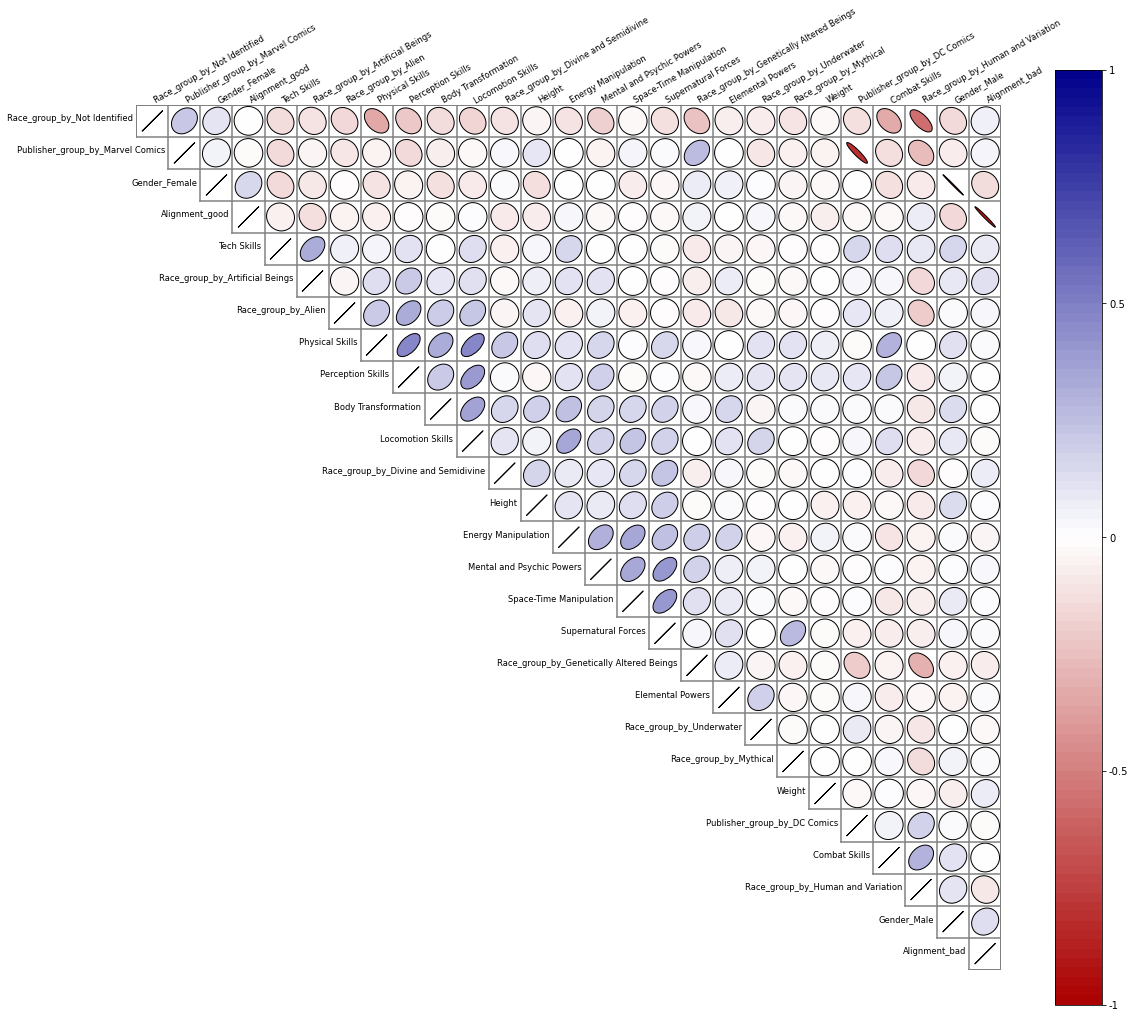

In [119]:
# Analisando a matriz de correlação das variáveis selecionadas, percebemos que as únicas correlações fortes existentes ocorrem entre dois valores da mesma variavel categórica.
# Por exemplo: Gender_Male possui correlação total negativa com Gender_Female, e o mesmo acontece para Publisher_Marvel e Publisher_DC, ou cores de olhos e cabelo.
# Deste modo, não precisamos remover mais nenhuma variável

# OBS: A variável name não agrega nenhum valor na clusterização ou classificação dos personagens, então ela não será utilizada nos modelos treinados

# Uma coisa que achei bastante estranha: Weight e Height praticamente não possuem correlação nenhuma, e eu esperava que devesse haver uma forte correlação positiva entre essas duas variaveis

# Quero agrupar os personagens de acordo com suas características unicas: poderes, universo (editora) e raça. Não Creio que informações como cor dos olhos ou cabelos possa
# ter algum efeito relevante no alinhamento ou nos poderes de cada um. Também são informações muito genéricas: um homem mal com poderes de fogo pode ter cabelos e olhos da
# mesma cor que uma mulher boa com poderes psiquicos. Creio que a raça do personagem possa fornecer informações sobre sua aparência e estatura corporal e também impactar
# na cultura, forma de pensar e agir do personagem (o que pode afetar diretamente seu alinhamento). Assim, irei desconsiderar as informações de cor de olhos e cabelos.
# Assim, também conseguimos reduzir um pouco mais a dimensionalidade dos dados, auxiliando na performance da clusterização.

heroes2.drop(columns = ['Eye_Color_group_by_-', 'Eye_Color_group_by_blue', 'Eye_Color_group_by_brown', 'Eye_Color_group_by_green',
                        'Eye_Color_group_by_red', 'Hair_Color_group_by_-', 'Hair_Color_group_by_Black', 'Hair_Color_group_by_Brown',
                        'Hair_Color_group_by_No Hair', 'Hair_Color_group_by_Red'], inplace = True)

matriz_corr = heroes2.corr()

corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'small')
fig = plt.gcf()
fig.set_size_inches(30, 30)
fig.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_5292\2100909156.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



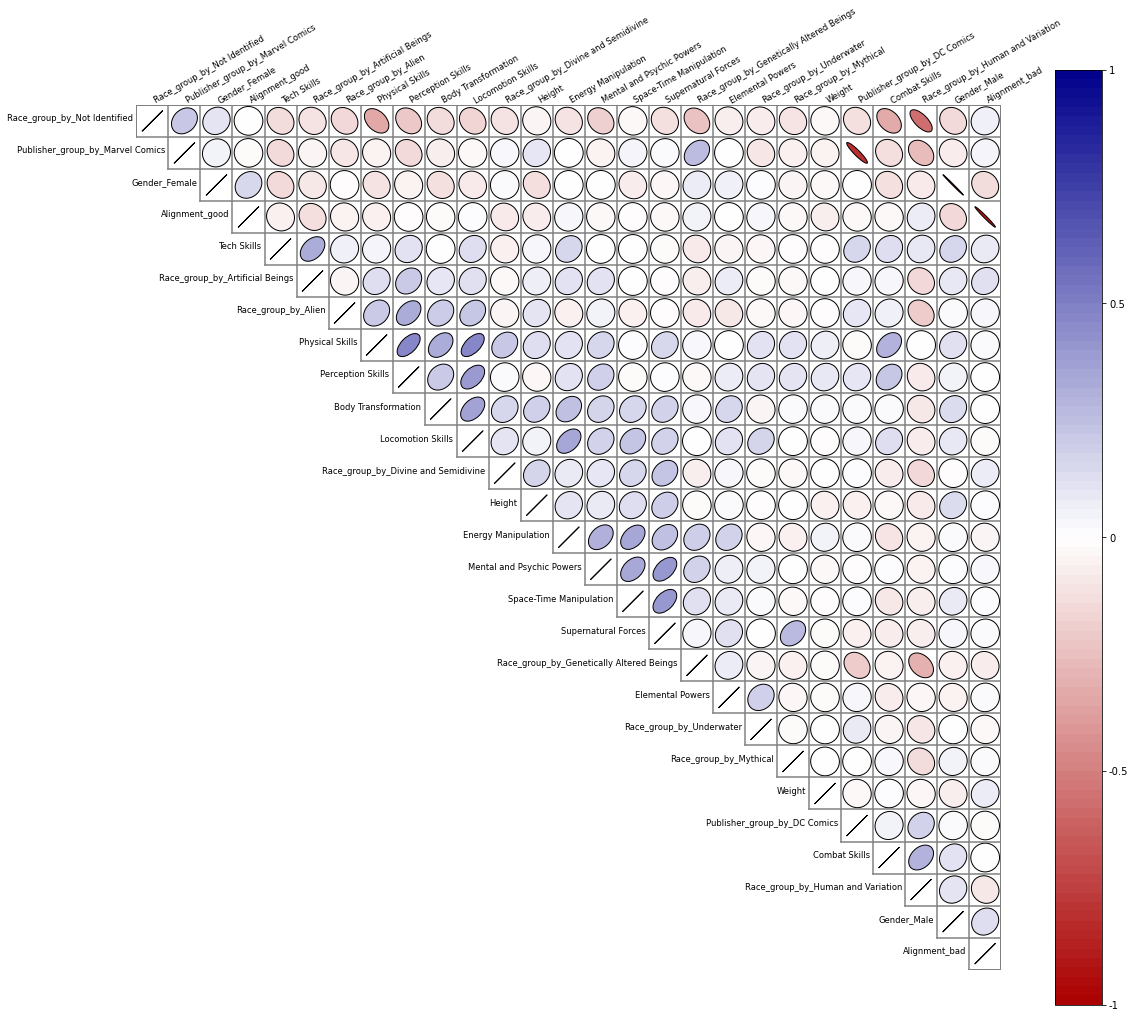

In [120]:
# Como esperado, a normalização não afeta a correlação entre os dados (já que o StandardScaler mantem a distribuição dos dados)

heroes2_normalized.drop(columns = ['Eye_Color_group_by_-', 'Eye_Color_group_by_blue', 'Eye_Color_group_by_brown', 'Eye_Color_group_by_green',
                        'Eye_Color_group_by_red', 'Hair_Color_group_by_-', 'Hair_Color_group_by_Black', 'Hair_Color_group_by_Brown',
                        'Hair_Color_group_by_No Hair', 'Hair_Color_group_by_Red'], inplace = True)

matriz_corr = heroes2_normalized.corr()

corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'small')
fig = plt.gcf()
fig.set_size_inches(30, 30)
fig.show()

## DBSCAN

##### DBSCAN agrupa dados com base em densidade de distribuição, o que o torna robusto a ruídos e eficiente para identificar clusters de formas arbitrárias. Ele é menos sensível à dimensionalidade em comparação com métodos como K-Means, porém é bem mais sensivel a escolha dos seus parâmetros.

#### Sem normalização de dados

In [121]:
# Definindo uma faixa de variação dos hiperparâmetros
faixa_eps = np.arange(0.25, 200.25, 0.25)
faixa_min_samples = np.arange(2, 12, 2)
metricas = ['euclidean', 'manhattan']

resultados_dbscan = list()

for metrica in metricas:

    eps_plot = []
    min_samples_plot = []

    valores_silhueta = []
    valores_daviesBoudin = []
    valores_calinskiHarabasz = []

    for e in faixa_eps:
        for ms in faixa_min_samples:

            agrupador = DBSCAN(eps = e, min_samples = ms, metric = metrica)
            labels = agrupador.fit_predict(heroes2)

            unique_labels, counts = np.unique(labels, return_counts = True)
            df = pd.DataFrame({
                'Cluster': unique_labels,
                'Qtd. de Amostras': counts
            })
            
            if ((df.shape[0] > 3) & (df.shape[0] < 21)):

                eps_plot.append(e)
                min_samples_plot.append(ms)

                valores_silhueta.append(silhouette_score(heroes2, labels))
                valores_daviesBoudin.append(davies_bouldin_score(heroes2, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2, labels))

                resultados_dbscan.append((e, ms, metrica, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df))

    print(f'\n\n{metrica}\n\n')
    plot_metrica(eps_plot, min_samples_plot, valores_silhueta, 'eps', 'min_sample', 'Coeficiente Médio de Silhueta')
    plot_metrica(eps_plot, min_samples_plot, valores_daviesBoudin, 'eps', 'min_sample', 'Índice de Davies-Boudin')
    plot_metrica(eps_plot, min_samples_plot, valores_calinskiHarabasz, 'eps', 'min_sample', 'Índice de Calinski-Harabasz')



euclidean






manhattan




In [122]:
# A metrica de distancia euclideana foi a que deu melhores resultados. Também pudemos ter os melhores valores para as metricas de
# avaliação escolhidas para maiores valores de eps, e menores valores de ms. Contudo, aumentar muito eps e diminior muito ms implica
# em gradativametne incluir todos os dados em um mesmo cluster.

resultados_dbscan_formatado = pd.DataFrame({'eps': [], 'ms': [], 'Metric': [], 'SL': [], 'DB': [], 'CH': [], 'DF': []})
for i in range(len(resultados_dbscan)):

    resultados_dbscan_formatado = pd.concat([
        resultados_dbscan_formatado,
        pd.DataFrame({'eps':    [resultados_dbscan[i][0]],
                      'ms':     [resultados_dbscan[i][1]],
                      'Metric': [resultados_dbscan[i][2]],
                      'SL':     [resultados_dbscan[i][3]],
                      'DB':     [resultados_dbscan[i][4]],
                      'CH':     [resultados_dbscan[i][5]],
                      'DF':     [resultados_dbscan[i][6].to_dict()]})
    ], ignore_index = True)

display(resultados_dbscan_formatado.sort_values(by = 'SL', ascending = False).head(3))
display(resultados_dbscan_formatado.sort_values(by = 'DB', ascending = True).head(3))
display(resultados_dbscan_formatado.sort_values(by = 'CH', ascending = False).head(3))

resultados_dbscan_formatado.to_csv('resultados_dbscan.csv', index = False)

,eps,ms,Metric,SL,DB,CH,DF
594,135.5,2.0,euclidean,0.870718,1.49682,55.572931,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 4, 1: 497, 2: 3, 3: 2}}"
1548,161.0,2.0,manhattan,0.870718,1.49682,55.572931,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 4, 1: 497, 2: 3, 3: 2}}"
1534,157.5,2.0,manhattan,0.870718,1.49682,55.572931,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 4, 1: 497, 2: 3, 3: 2}}"


,eps,ms,Metric,SL,DB,CH,DF
783,182.75,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"
790,184.50,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"
791,184.75,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"


,eps,ms,Metric,SL,DB,CH,DF
783,182.75,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"
799,186.75,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"
789,184.25,2.0,euclidean,0.866267,0.996817,167.73943,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 2, 1: 498, 2: 3, 3: 3}}"


In [123]:
# Podemos notar que as clusterizações mais bem avaliadas possuem um grande grupo, e pequenos outros agrupamentos (quase como amostras que não foram agrupadas)
# Vamos verificar se há alguma boa opção e clusterização onde todos os agrupamentos tem pelo menos 20 amostras:

maiores_clusters = list()
for i in resultados_dbscan_formatado.index:
    if min(resultados_dbscan_formatado.loc[i].DF['Qtd. de Amostras'].values()) > 20:
        maiores_clusters.append(i)

resultados_dbscan_formatado.loc[maiores_clusters]

# Notamos que estes clusters não possuem uma boa avaliação em nenhuma métrica utilizada.

,eps,ms,Metric,SL,DB,CH,DF
24,4.75,6.0,euclidean,-0.382735,1.990294,0.203546,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 314, 1: 93, 2: 77, 3: 22}}"
28,5.00,6.0,euclidean,-0.313212,1.989670,0.256142,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 286, 1: 108, 2: 31, 3: 81}}"
33,5.25,8.0,euclidean,-0.307724,1.989621,0.260297,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 284, 1: 107, 2: 33, 3: 82}}"
34,5.25,10.0,euclidean,-0.384652,1.990272,0.205261,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 313, 1: 94, 2: 75, 3: 24}}"
36,5.50,6.0,euclidean,-0.192828,1.988182,0.381241,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 236, 1: 130, 2: 39, 3: 101}}"
38,5.50,10.0,euclidean,-0.314307,1.989668,0.256142,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 286, 1: 109, 2: 81, 3: 30}}"
41,5.75,10.0,euclidean,-0.223463,1.988690,0.338457,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 251, 1: 123, 2: 35, 3: 97}}"


#### Com normalização de dados

In [124]:
# Definindo uma faixa de variação dos hiperparâmetros
faixa_eps = np.arange(0.25, 200.25, 0.25)
faixa_min_samples = np.arange(2, 12, 2)
metricas = ['euclidean', 'manhattan']

resultados_dbscan_c_norm = list()

for metrica in metricas:

    eps_plot = []
    min_samples_plot = []

    valores_silhueta = []
    valores_daviesBoudin = []
    valores_calinskiHarabasz = []

    for e in faixa_eps:
        for ms in faixa_min_samples:

            agrupador = DBSCAN(eps = e, min_samples = ms, metric = metrica)
            labels = agrupador.fit_predict(heroes2_normalized)

            unique_labels, counts = np.unique(labels, return_counts = True)
            df = pd.DataFrame({
                'Cluster': unique_labels,
                'Qtd. de Amostras': counts
            })
            
            if ((df.shape[0] > 3) & (df.shape[0] < 21)):

                eps_plot.append(e)
                min_samples_plot.append(ms)

                valores_silhueta.append(silhouette_score(heroes2_normalized, labels))
                valores_daviesBoudin.append(davies_bouldin_score(heroes2_normalized, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2_normalized, labels))

                resultados_dbscan_c_norm.append((e, ms, metrica, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df))

    print(f'\n\n{metrica}\n\n')
    plot_metrica(eps_plot, min_samples_plot, valores_silhueta, 'eps', 'min_sample', 'Coeficiente Médio de Silhueta')
    plot_metrica(eps_plot, min_samples_plot, valores_daviesBoudin, 'eps', 'min_sample', 'Índice de Davies-Boudin')
    plot_metrica(eps_plot, min_samples_plot, valores_calinskiHarabasz, 'eps', 'min_sample', 'Índice de Calinski-Harabasz')



euclidean






manhattan




In [125]:
resultados_dbscan_c_norm_formatado = pd.DataFrame({'eps': [], 'ms': [], 'Metric': [], 'SL': [], 'DB': [], 'CH': [], 'DF': []})
for i in range(len(resultados_dbscan_c_norm)):

    resultados_dbscan_c_norm_formatado = pd.concat([
        resultados_dbscan_c_norm_formatado,
        pd.DataFrame({'eps':    [resultados_dbscan[i][0]],
                      'ms':     [resultados_dbscan[i][1]],
                      'Metric': [resultados_dbscan[i][2]],
                      'SL':     [resultados_dbscan[i][3]],
                      'DB':     [resultados_dbscan[i][4]],
                      'CH':     [resultados_dbscan[i][5]],
                      'DF':     [resultados_dbscan[i][6].to_dict()]})
    ], ignore_index = True)

display(resultados_dbscan_c_norm_formatado.sort_values(by = 'SL', ascending = False).head(3))
display(resultados_dbscan_c_norm_formatado.sort_values(by = 'DB', ascending = True).head(3))
display(resultados_dbscan_c_norm_formatado.sort_values(by = 'CH', ascending = False).head(3))

resultados_dbscan_c_norm_formatado.to_csv('resultados_dbscan_c_norm.csv', index = False)

,eps,ms,Metric,SL,DB,CH,DF
93,13.00,4.0,euclidean,0.499314,1.963460,2.508251,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 60, 1: 437, 2: 5, 3: 4}}"
90,12.75,4.0,euclidean,0.443419,1.965991,2.286387,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 65, 1: 431, 2: 5, 3: 5}}"
82,12.00,4.0,euclidean,0.441721,1.966908,2.207051,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 67, 1: 430, 2: 5, 3: 4}}"


,eps,ms,Metric,SL,DB,CH,DF
95,13.25,2.0,euclidean,0.133945,1.936175,1.027958,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13}, 'Qtd. de Amostras': {0: 33, 1: 3, 2: 438, 3: 2, 4: 2, 5: 2, 6: 2, 7: 4, 8: 3, 9: 2, 10: 5, 11: 3, 12: 2, 13: 3, 14: 2}}"
92,13.00,2.0,euclidean,0.133945,1.936175,1.027958,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13}, 'Qtd. de Amostras': {0: 33, 1: 3, 2: 438, 3: 2, 4: 2, 5: 2, 6: 2, 7: 4, 8: 3, 9: 2, 10: 5, 11: 3, 12: 2, 13: 3, 14: 2}}"
89,12.75,2.0,euclidean,0.162669,1.939636,0.897340,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14}, 'Qtd. de Amostras': {0: 35, 1: 3, 2: 432, 3: 6, 4: 2, 5: 2, 6: 2, 7: 2, 8: 3, 9: 2, 10: 5, 11: 3, 12: 2, 13: 3, 14: 2, 15: 2}}"


,eps,ms,Metric,SL,DB,CH,DF
93,13.00,4.0,euclidean,0.499314,1.963460,2.508251,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 60, 1: 437, 2: 5, 3: 4}}"
90,12.75,4.0,euclidean,0.443419,1.965991,2.286387,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 65, 1: 431, 2: 5, 3: 5}}"
85,12.25,4.0,euclidean,0.441331,1.966456,2.246109,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 66, 1: 431, 2: 5, 3: 4}}"


In [126]:
# Podemos notar que, mesmo normalizando os dados, ainda não obtivemos um bom resultado. Deste modo, podemos concluir que o DBSCAN não
# é um algoritmo que desempenha bem com o conjunto de dados em questão.

maiores_clusters = list()
for i in resultados_dbscan_formatado.index:
    if min(resultados_dbscan_formatado.loc[i].DF['Qtd. de Amostras'].values()) > 20:
        maiores_clusters.append(i)

resultados_dbscan_formatado.loc[maiores_clusters]

,eps,ms,Metric,SL,DB,CH,DF
24,4.75,6.0,euclidean,-0.382735,1.990294,0.203546,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 314, 1: 93, 2: 77, 3: 22}}"
28,5.00,6.0,euclidean,-0.313212,1.989670,0.256142,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 286, 1: 108, 2: 31, 3: 81}}"
33,5.25,8.0,euclidean,-0.307724,1.989621,0.260297,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 284, 1: 107, 2: 33, 3: 82}}"
34,5.25,10.0,euclidean,-0.384652,1.990272,0.205261,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 313, 1: 94, 2: 75, 3: 24}}"
36,5.50,6.0,euclidean,-0.192828,1.988182,0.381241,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 236, 1: 130, 2: 39, 3: 101}}"
38,5.50,10.0,euclidean,-0.314307,1.989668,0.256142,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 286, 1: 109, 2: 81, 3: 30}}"
41,5.75,10.0,euclidean,-0.223463,1.988690,0.338457,"{'Cluster': {0: -1, 1: 0, 2: 1, 3: 2}, 'Qtd. de Amostras': {0: 251, 1: 123, 2: 35, 3: 97}}"


#### Vizualizando os clusters

In [127]:
agrupador = DBSCAN(eps = 5.5, min_samples = 6, metric = 'euclidean')
labels = agrupador.fit_predict(heroes2)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = heroes['Gender'],
    y = heroes['Alignment'],
    z = heroes['Publisher_group_by'],
    mode = 'markers',
    marker = dict(color = labels.astype(int)),
    text = agrupador.labels_
))

fig.update_layout(scene = dict(
                    xaxis_title = 'Gender',
                    yaxis_title = 'Alignment',
                    zaxis_title = 'Publisher_group_by'))

fig.update_layout(width = 600, height = 600)
fig.show()

unique_labels, counts = np.unique(labels, return_counts = True)

df = pd.DataFrame({
    'Cluster': unique_labels,
    'Qtd. de Amostras': counts
})

df

# Cluster 0 (Rosa Claro): Personagens não maus da Marvel + Homens não neutros da DC
# Cluster 1 (Verde Claro): Homens neutros da DC
# Cluster 2 (Verde Escuro): Mulheres não neutras da Marvel
# Cluster -1 (Rosa Escuro): Amostras não agrupadas.

,Cluster,Qtd. de Amostras
0,-1,236
1,0,130
2,1,39
3,2,101


In [128]:
heroes2_clusterizado = heroes2.copy()
heroes2_clusterizado['Clusters'] = labels

heroes2_c_1 = heroes2_clusterizado[heroes2_clusterizado.Clusters == -1]
heroes2_c0  = heroes2_clusterizado[heroes2_clusterizado.Clusters == 0]
heroes2_c1  = heroes2_clusterizado[heroes2_clusterizado.Clusters == 1]
heroes2_c2  = heroes2_clusterizado[heroes2_clusterizado.Clusters == 2]

skills = ['Physical Skills', 'Energy Manipulation', 'Elemental Powers', 'Mental and Psychic Powers', 'Space-Time Manipulation',
          'Body Transformation', 'Supernatural Forces', 'Tech Skills', 'Perception Skills', 'Locomotion Skills', 'Combat Skills']

races = ['Race_group_by_Alien', 'Race_group_by_Artificial Beings', 'Race_group_by_Divine and Semidivine', 'Race_group_by_Genetically Altered Beings',
       'Race_group_by_Human and Variation', 'Race_group_by_Mythical', 'Race_group_by_Not Identified', 'Race_group_by_Underwater']

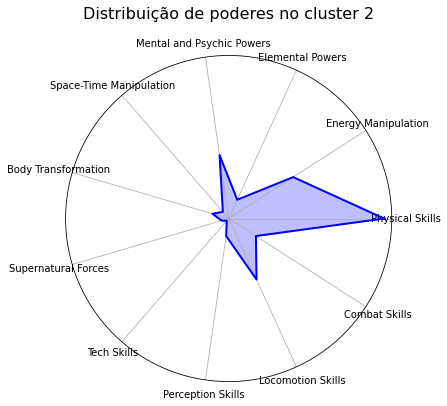

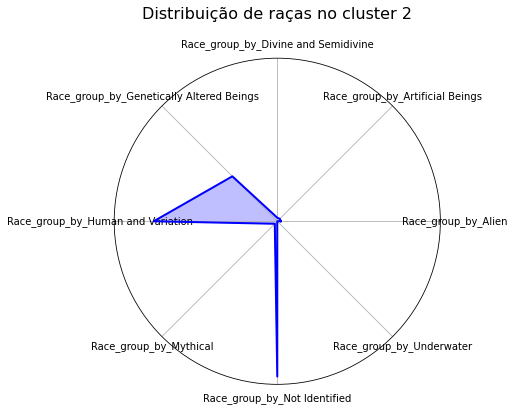

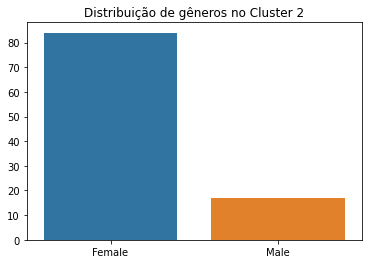

In [129]:
# Cluster 2

skill_media = list()
for skill in skills:
    skill_media.append(round(heroes2_c2[skill].mean(), 2))

raca_media = list()
for race in races:
    raca_media.append(round(heroes2_c2[race].mean(), 2))

radar_chart(skills, skill_media, "Distribuição de poderes no cluster 2")
radar_chart(races, raca_media, "Distribuição de raças no cluster 2")

gender = list()
for i in heroes2_c2.index:
    if heroes2_c2.Gender_Female.loc[i] == 1:
        gender.append('Female')
    elif heroes2_c2.Gender_Male.loc[i] == 1:
        gender.append('Male')
    else:
        gender.append('Other / Not Identified')

x, y = np.unique(gender, return_counts = True)
sns.barplot(x = x, y = y)
plt.title('Distribuição de gêneros no Cluster 2')
plt.show()

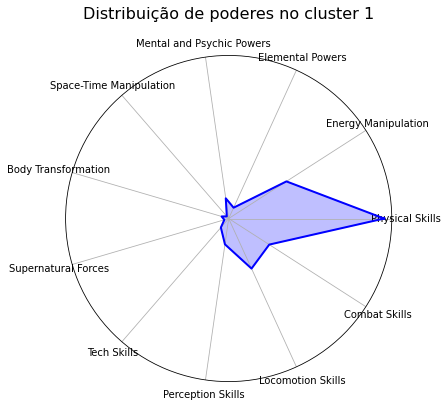

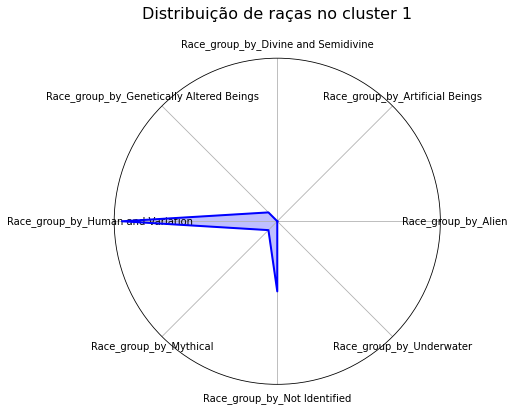

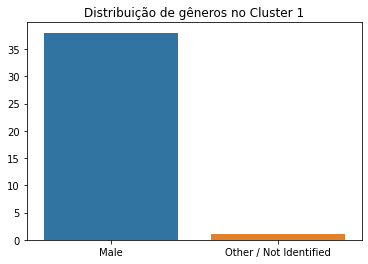

In [130]:
# Cluster 1

skill_media = list()
for skill in skills:
    skill_media.append(round(heroes2_c1[skill].mean(), 2))

raca_media = list()
for race in races:
    raca_media.append(round(heroes2_c1[race].mean(), 2))

radar_chart(skills, skill_media, "Distribuição de poderes no cluster 1")
radar_chart(races, raca_media, "Distribuição de raças no cluster 1")

gender = list()
for i in heroes2_c1.index:
    if heroes2_c1.Gender_Female.loc[i] == 1:
        gender.append('Female')
    elif heroes2_c1.Gender_Male.loc[i] == 1:
        gender.append('Male')
    else:
        gender.append('Other / Not Identified')

x, y = np.unique(gender, return_counts = True)
sns.barplot(x = x, y = y)
plt.title('Distribuição de gêneros no Cluster 1')
plt.show()

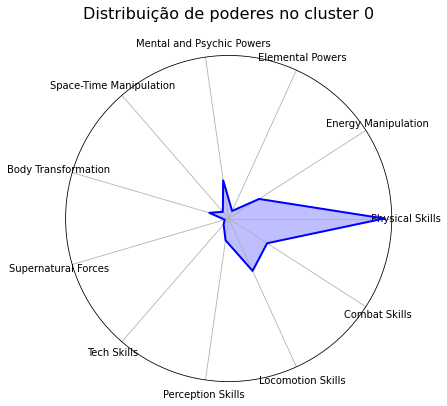

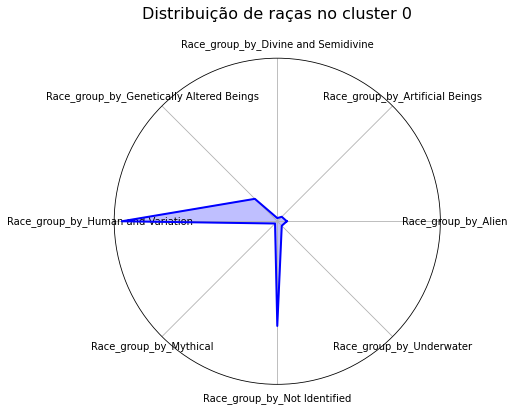

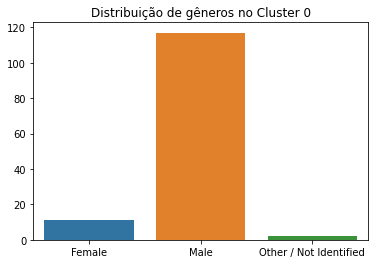

In [131]:
# Cluster 0

skill_media = list()
for skill in skills:
    skill_media.append(round(heroes2_c0[skill].mean(), 2))

raca_media = list()
for race in races:
    raca_media.append(round(heroes2_c0[race].mean(), 2))

radar_chart(skills, skill_media, "Distribuição de poderes no cluster 0")
radar_chart(races, raca_media, "Distribuição de raças no cluster 0")

gender = list()
for i in heroes2_c0.index:
    if heroes2_c0.Gender_Female.loc[i] == 1:
        gender.append('Female')
    elif heroes2_c0.Gender_Male.loc[i] == 1:
        gender.append('Male')
    else:
        gender.append('Other / Not Identified')

x, y = np.unique(gender, return_counts = True)
sns.barplot(x = x, y = y)
plt.title('Distribuição de gêneros no Cluster 0')
plt.show()

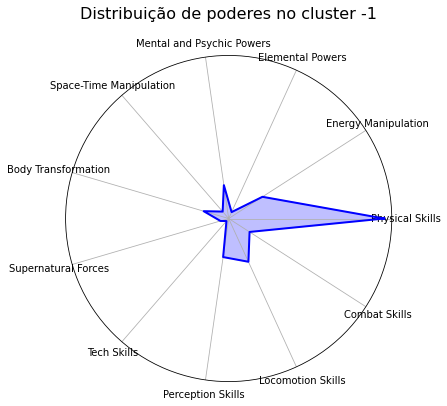

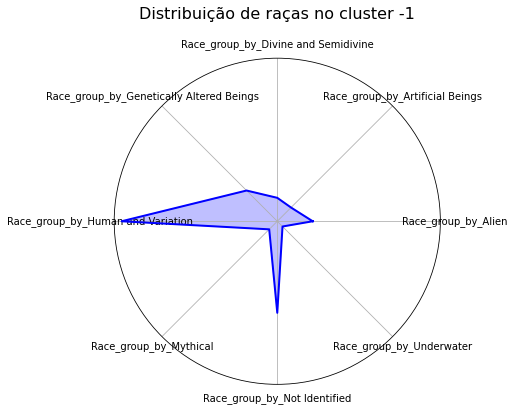

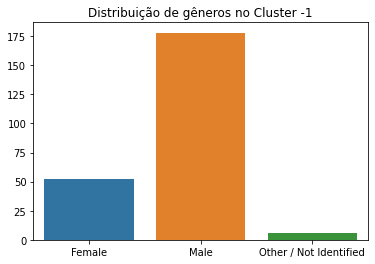

In [132]:
skill_media = list()
for skill in skills:
    skill_media.append(round(heroes2_c_1[skill].mean(), 2))

raca_media = list()
for race in races:
    raca_media.append(round(heroes2_c_1[race].mean(), 2))

radar_chart(skills, skill_media, "Distribuição de poderes no cluster -1")
radar_chart(races, raca_media, "Distribuição de raças no cluster -1")

gender = list()
for i in heroes2_c_1.index:
    if heroes2_c_1.Gender_Female.loc[i] == 1:
        gender.append('Female')
    elif heroes2_c_1.Gender_Male.loc[i] == 1:
        gender.append('Male')
    else:
        gender.append('Other / Not Identified')

x, y = np.unique(gender, return_counts = True)
sns.barplot(x = x, y = y)
plt.title('Distribuição de gêneros no Cluster -1')
plt.show()

In [133]:
# Ambos agrupamentos são bastante similares quanto a poderes e raças e, embora fosse esperado que o algoritmo distinguisse melhor os personagens
# dentro dessas caracteristicas, nota-se que há um grande desbalanceamento nos dados, existindo muito mais personagens humanos ou com habilidades fisicas

heroes2[races].sum(), '----------------------------------------------------', heroes2[skills].sum()

(Race_group_by_Alien                          26
 Race_group_by_Artificial Beings              15
 Race_group_by_Divine and Semidivine          15
 Race_group_by_Genetically Altered Beings     58
 Race_group_by_Human and Variation           215
 Race_group_by_Mythical                       12
 Race_group_by_Not Identified                152
 Race_group_by_Underwater                      6
 dtype: int64,
 '----------------------------------------------------',
 Physical Skills              1858
 Energy Manipulation           540
 Elemental Powers              108
 Mental and Psychic Powers     446
 Space-Time Manipulation       104
 Body Transformation           272
 Supernatural Forces            87
 Tech Skills                    56
 Perception Skills             390
 Locomotion Skills             621
 Combat Skills                 368
 dtype: int64)

## Mean Shift

In [134]:
# Com dados não normalizados:

# Determinamos uma faixa de valores de teste para o quantil (único hiperparâmetro do Mean Shift)
faixa_quantil = np.arange(0.1, 1.1, 0.1)
quantil_plot = []
bw_plot = []

valores_silhueta = []
valores_daviesBoudin = []
valores_calinskiHarabasz = []

resultados_meanshift = list()

for q in faixa_quantil:
    
    BW_ = estimate_bandwidth(heroes2, quantile = q)
    faixa_bw = [0.5*BW_, 0.75*BW_, BW_, 1.25*BW_, 1.5*BW_]
    
    for BW in faixa_bw:
        if((BW > 0) & (BW not in bw_plot)):
            agrupador = MeanShift(bandwidth = BW)
            labels = agrupador.fit_predict(heroes2)

            unique_labels, counts = np.unique(labels, return_counts = True)
            df = pd.DataFrame({
                'Cluster': unique_labels,
                'Qtd. de Amostras': counts
            })
            
            if ((df.shape[0] > 1) & (df.shape[0] < 21)):

                bw_plot.append(BW)

                valores_silhueta.append(silhouette_score(heroes2, labels))
                valores_daviesBoudin.append(davies_bouldin_score(heroes2, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2, labels))

                resultados_meanshift.append((BW, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df))

x = pd.DataFrame({'bw': bw_plot, 'cs': valores_silhueta, 'db': valores_daviesBoudin, 'ch': valores_calinskiHarabasz})
x.sort_values('bw', inplace = True)

plot_metrica(x.bw, x.cs, [], 'Bandwidth', 'Coeficiente Médio de Silhueta', '')
plot_metrica(x.bw, x.db, [], 'Bandwidth', 'Índice de Davies-Boudin', '')
plot_metrica(x.bw, x.ch, [], 'Bandwidth', 'Índice de Calinski-Harabasz', '')

resultados_meanshift

[(196394.61271956243,
  0.9957567005148871,
  0.0001370349004059223,
  1418550792277.1501,
     Cluster  Qtd. de Amostras
  0        0               504
  1        1                 1
  2        2                 1),
 (294591.9190793437,
  0.9957567005148871,
  0.0001370349004059223,
  1418550792277.1501,
     Cluster  Qtd. de Amostras
  0        0               504
  1        1                 1
  2        2                 1),
 (392789.22543912486,
  0.998016938757041,
  6.328365513782488e-06,
  197828500.84354532,
     Cluster  Qtd. de Amostras
  0        0               505
  1        1                 1),
 (490986.53179890604,
  0.998016938757041,
  6.328365513782488e-06,
  197828500.84354532,
     Cluster  Qtd. de Amostras
  0        0               505
  1        1                 1),
 (589183.8381586873,
  0.998016938757041,
  6.328365513782488e-06,
  197828500.84354532,
     Cluster  Qtd. de Amostras
  0        0               505
  1        1                 1),
 (196399.6577

In [135]:
# Com dados normalizados:

# Determinamos uma faixa de valores de teste para o quantil (único hiperparâmetro do Mean Shift)
faixa_quantil = np.arange(0.1, 1.1, 0.1)
quantil_plot = []
bw_plot = []

valores_silhueta = []
valores_daviesBoudin = []
valores_calinskiHarabasz = []

resultados_meanshift_c_norm = list()

for q in faixa_quantil:
    
    BW_ = estimate_bandwidth(heroes2_normalized, quantile = q)
    faixa_bw = [0.5*BW_, 0.75*BW_, BW_, 1.25*BW_, 1.5*BW_]
    
    for BW in faixa_bw:
        if((BW > 0) & (BW not in bw_plot)):
            agrupador = MeanShift(bandwidth = BW)
            labels = agrupador.fit_predict(heroes2_normalized)

            unique_labels, counts = np.unique(labels, return_counts = True)
            df = pd.DataFrame({
                'Cluster': unique_labels,
                'Qtd. de Amostras': counts
            })
            
            if ((df.shape[0] > 1) & (df.shape[0] < 21)):

                bw_plot.append(BW)

                valores_silhueta.append(silhouette_score(heroes2_normalized, labels))
                valores_daviesBoudin.append(davies_bouldin_score(heroes2_normalized, labels))
                valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2_normalized, labels))

                resultados_meanshift_c_norm.append((BW, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df))

x = pd.DataFrame({'bw': bw_plot, 'cs': valores_silhueta, 'db': valores_daviesBoudin, 'ch': valores_calinskiHarabasz})
x.sort_values('bw', inplace = True)

plot_metrica(x.bw, x.cs, [], 'Bandwidth', 'Coeficiente Médio de Silhueta', '')
plot_metrica(x.bw, x.db, [], 'Bandwidth', 'Índice de Davies-Boudin', '')
plot_metrica(x.bw, x.ch, [], 'Bandwidth', 'Índice de Calinski-Harabasz', '')

resultados_meanshift_c_norm

[(4.683443568583864,
  0.2534063006265866,
  1.2174504239427317,
  14.940228910107397,
      Cluster  Qtd. de Amostras
  0         0               466
  1         1                 5
  2         2                 6
  3         3                 1
  4         4                 6
  5         5                 1
  6         6                 1
  7         7                 3
  8         8                 7
  9         9                 2
  10       10                 1
  11       11                 1
  12       12                 2
  13       13                 4),
 (5.620132282300636,
  0.558459640863333,
  0.372945566887141,
  19.661709730587702,
     Cluster  Qtd. de Amostras
  0        0               501
  1        1                 2
  2        2                 1
  3        3                 1
  4        4                 1),
 (5.219738368047785,
  0.3585699402380697,
  0.7025756602545984,
  18.699890051676906,
     Cluster  Qtd. de Amostras
  0        0               487
  1      

In [136]:
# Com dados normalizados:

# Determinamos uma faixa de valores de teste para o quantil (único hiperparâmetro do Mean Shift)
faixa_quantil = np.arange(0.1, 1.1, 0.1)
quantil_plot = []
bw_plot = []

valores_silhueta = []
valores_daviesBoudin = []
valores_calinskiHarabasz = []

resultados_meanshift_c_norm = list()

    
for BW in np.arange(0.5, 15.5, 0.5):

    agrupador = MeanShift(bandwidth = BW)
    labels = agrupador.fit_predict(heroes2_normalized)

    unique_labels, counts = np.unique(labels, return_counts = True)
    df = pd.DataFrame({
        'Cluster': unique_labels,
        'Qtd. de Amostras': counts
    })
    
    if ((df.shape[0] > 1) & (df.shape[0] < 21)):

        bw_plot.append(BW)

        valores_silhueta.append(silhouette_score(heroes2_normalized, labels))
        valores_daviesBoudin.append(davies_bouldin_score(heroes2_normalized, labels))
        valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2_normalized, labels))

        resultados_meanshift_c_norm.append((BW, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df))

x = pd.DataFrame({'bw': bw_plot, 'cs': valores_silhueta, 'db': valores_daviesBoudin, 'ch': valores_calinskiHarabasz})
x.sort_values('bw', inplace = True)

plot_metrica(x.bw, x.cs, [], 'Bandwidth', 'Coeficiente Médio de Silhueta', '')
plot_metrica(x.bw, x.db, [], 'Bandwidth', 'Índice de Davies-Boudin', '')
plot_metrica(x.bw, x.ch, [], 'Bandwidth', 'Índice de Calinski-Harabasz', '')

## Hierarchical Clustering

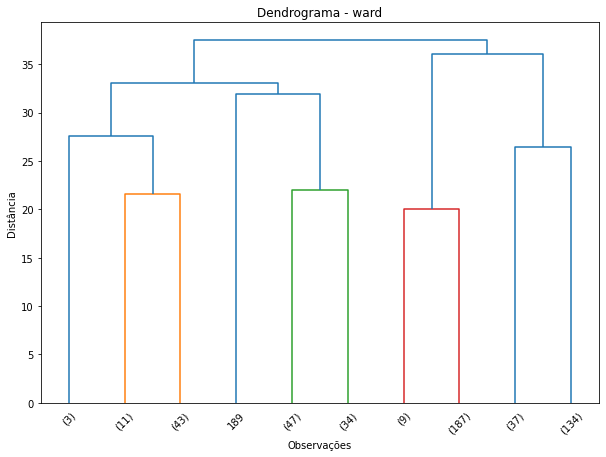

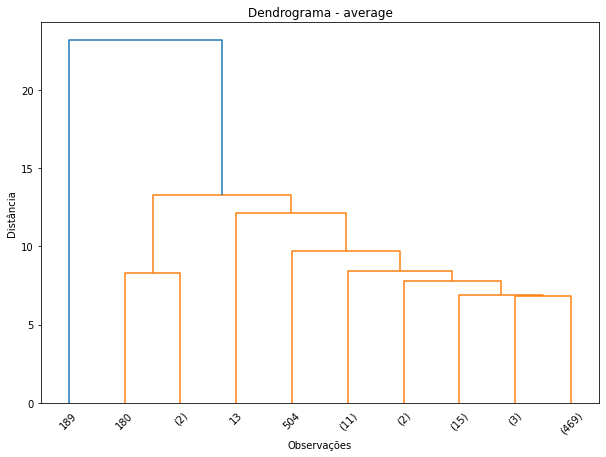

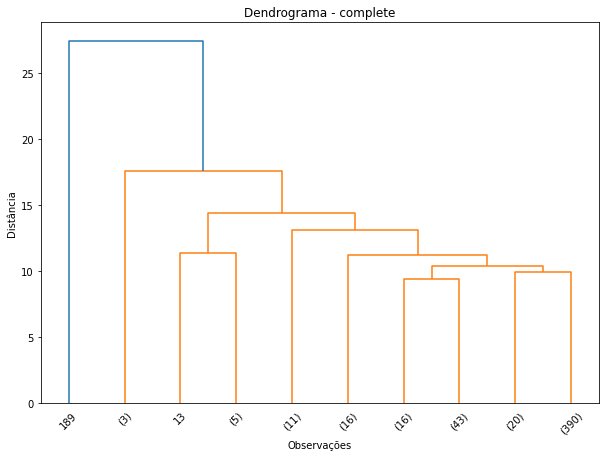

In [5]:
for method in ['ward', 'average', 'complete']:
    linkage_matrix = linkage(heroes2_normalized, method = method)

    plt.figure(figsize = (10, 7))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
    plt.title(f'Dendrograma - {method}')
    plt.xlabel('Observações')
    plt.ylabel('Distância')
    plt.show()

In [6]:
methods = {
    'ward': np.arange(0, 42, 2),
    'average': np.arange(0, 42, 2),
    'complete': np.arange(0, 42, 2)
}

resultados_hc = list()

for method in methods.keys():

    valores_silhueta = list()
    valores_daviesBoudin = list()
    valores_calinskiHarabasz = list()

    t_plot = list()

    for t in methods[method]:

        linkage_matrix = linkage(heroes2_normalized, method = method)
        labels = fcluster(linkage_matrix, t = t, criterion = 'distance')

        unique_labels, counts = np.unique(labels, return_counts = True)
        df = pd.DataFrame({
            'Cluster': unique_labels,
            'Qtd. de Amostras': counts
        })
        
        if ((df.shape[0] > 3) & (df.shape[0] < 21)):

            t_plot.append(t)

            valores_silhueta.append(silhouette_score(heroes2_normalized, labels))
            valores_daviesBoudin.append(davies_bouldin_score(heroes2_normalized, labels))
            valores_calinskiHarabasz.append(calinski_harabasz_score(heroes2_normalized, labels))

            resultados_hc.append((t, method, valores_silhueta[-1], valores_daviesBoudin[-1], valores_calinskiHarabasz[-1], df, df.shape[0], df['Qtd. de Amostras'].min(), df['Qtd. de Amostras'].max()))

    print(f'\n\n{method}\n\n')
    plot_metrica(t_plot, valores_silhueta, [], 't', 'Coeficiente Médio de Silhueta', '')
    plot_metrica(t_plot, valores_daviesBoudin, [], 't', 'Índice de Davies-Boudin', '')
    plot_metrica(t_plot, valores_calinskiHarabasz, [], 't', 'Índice de Calinski-Harabasz', '')



ward






average






complete




In [7]:
# O modelo com método "average" foi o que teve resultados mais inconsistentes em relação as métricas de avaliação

# O modelo com método "ward" foi o que teve melhores resultados para as metricas de avaliação utilizadas
# Avaliando estes modelos, percebemos que ele teve uma alta pontuação pois criou um cluster muito grande contendo
# a grande maioria dos dados

for i in range(len(resultados_hc)):
    if resultados_hc[i][1] == 'average':
        print(resultados_hc[i]) 

(8, 'average', 0.3988460356738358, 0.5702690474994603, 21.051780572052195,    Cluster  Qtd. de Amostras
0        1                 2
1        2                 1
2        3                11
3        4               489
4        5                 1
5        6                 1
6        7                 1, 7, 1, 489)
(10, 'average', 0.5691482779901019, 0.4371685083856723, 25.177103967482175,    Cluster  Qtd. de Amostras
0        1                 3
1        2               501
2        3                 1
3        4                 1, 4, 1, 501)
(12, 'average', 0.5691482779901019, 0.4371685083856723, 25.177103967482175,    Cluster  Qtd. de Amostras
0        1                 3
1        2               501
2        3                 1
3        4                 1, 4, 1, 501)


In [8]:
# Vamos seguir com a escolha do método ward com t = 16

linkage_matrix = linkage(heroes2_normalized, method = 'ward')
labels = fcluster(linkage_matrix, t = 16, criterion = 'distance')

unique_labels, counts = np.unique(labels, return_counts = True)
df = pd.DataFrame({
    'Cluster': unique_labels,
    'Qtd. de Amostras': counts
})

df

,Cluster,Qtd. de Amostras
0,1,3
1,2,11
2,3,26
3,4,17
4,5,47
5,6,12
6,7,22
7,8,1
8,9,9
9,10,187


#### Visualização dos clusters

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = heroes['Gender'],
    y = heroes['Alignment'],
    z = heroes['Publisher_group_by'],
    mode = 'markers',
    marker = dict(color = labels.astype(int)),
    text = labels
))

fig.update_layout(scene = dict(
                    xaxis_title = 'Gender',
                    yaxis_title = 'Alignment',
                    zaxis_title = 'Publisher_group_by'))

fig.update_layout(width = 600, height = 600)
fig.show()

unique_labels, counts = np.unique(labels, return_counts = True)

df = pd.DataFrame({
    'Cluster': unique_labels,
    'Qtd. de Amostras': counts
})

df

,Cluster,Qtd. de Amostras
0,1,3
1,2,11
2,3,26
3,4,17
4,5,47
5,6,12
6,7,22
7,8,1
8,9,9
9,10,187


In [10]:
heroes2_clusterizado = heroes2.copy()
heroes2_clusterizado['Clusters'] = labels

clusters_data = dict()
for cluster in df.Cluster:
    clusters_data[cluster] = heroes2_clusterizado[heroes2_clusterizado.Clusters == cluster]

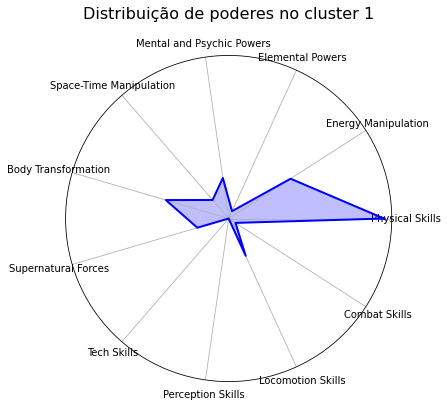

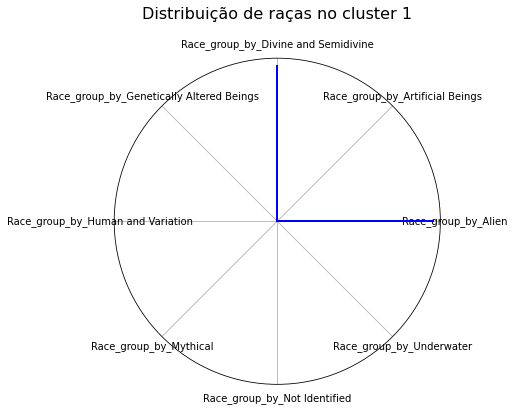

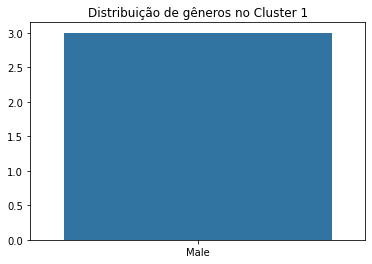

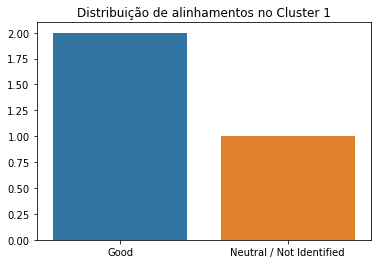

In [24]:
analise_de_cluster(clusters_data, 1)

In [21]:
heroes.replace({True: 1, False: 0}, inplace = True)
heroes['Cluster'] = heroes2_clusterizado['Clusters']
heroes.to_csv('heroes2_clusterizado.csv', index = False)